In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import joblib

In [2]:
data=pd.read_csv("D:\FCI\Machine Learning\Wine Quality\winequality-red.csv")

In [3]:
data['quality']=[1 if y>=7 else 0 for y in data['quality']]
X = data.drop('quality', axis=1)
y = data['quality']
X_res, y_res=SMOTE().fit_resample(X,y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### Feature Scaling

In [5]:

mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
"""
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.transform(X_test)
"""

'\nst=StandardScaler()\nX_train=st.fit_transform(X_train)\nX_test=st.transform(X_test)\n'

#### MinMaxScaler Equation
* X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
* X_scaled = X_std * (max - min) + min

### PCA

In [6]:
#pca=PCA(n_components=0.90)

In [7]:
#X_train=pca.fit_transform(X_train)
#X_test=pca.transform(X_test)

In [8]:
#pca.explained_variance_ratio_

In [9]:
#sum(pca.explained_variance_ratio_)

In [10]:
#print(f"X_train.shape {X_train.shape}")
#print(f"X_test.shape {X_test.shape}")

### Logistic Regression

In [11]:
log=LogisticRegression()
log.fit(X_train, y_train)
y_pred1=log.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred1)

0.8191681735985533

In [13]:
precision_score(y_test, y_pred1)

0.7793103448275862

In [14]:
recall_score(y_test, y_pred1)

0.8625954198473282

In [15]:
f1_score(y_test, y_pred1)

0.8188405797101449

### SVM

In [16]:
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred2=svm.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred2)

0.8806509945750453

In [18]:
precision_score(y_test, y_pred2)

0.831081081081081

In [19]:
recall_score(y_test, y_pred2)

0.9389312977099237

In [20]:
f1_score(y_test, y_pred2)

0.8817204301075269

### KNN

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred3)

0.8679927667269439

In [23]:
precision_score(y_test, y_pred3)

0.7872340425531915

In [24]:
recall_score(y_test, y_pred3)

0.9885496183206107

In [25]:
f1_score(y_test, y_pred3)

0.8764805414551607

### Decision Tree

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred4)

0.9150090415913201

In [28]:
precision_score(y_test, y_pred4)

0.8853046594982079

In [29]:
recall_score(y_test, y_pred4)

0.9427480916030534

In [30]:
f1_score(y_test, y_pred4)

0.9131238447319779

### Random Forest Classifier

In [31]:
rf = RandomForestClassifier()

In [32]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
y_pred5 = rf.predict(X_test)

In [34]:
accuracy_score(y_test, y_pred5)

0.9349005424954792

In [35]:
precision_score(y_test, y_pred5)

0.897887323943662

In [36]:
recall_score(y_test, y_pred5)

0.9732824427480916

In [37]:
f1_score(y_test, y_pred5)

0.9340659340659341

### Gradient Boosting Classifier

In [38]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred6 = gbc.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred6)

0.9023508137432188

In [40]:
precision_score(y_test, y_pred6)

0.8561643835616438

In [41]:
recall_score(y_test, y_pred6)

0.9541984732824428

In [42]:
f1_score(y_test, y_pred6)

0.9025270758122744

# Visualising Results

In [43]:
Final_Results = pd.DataFrame({'Models':['Logestic Regression', 'Support Vector Classifier', 'K-nearest Neighbor', 'Decision Tree', 'Random Forest', 'Gradient Boosting Classifier'],
                              'Accuracy':[accuracy_score(y_test, y_pred1)*100,
                                         accuracy_score(y_test, y_pred2)*100,
                                         accuracy_score(y_test, y_pred3)*100,
                                         accuracy_score(y_test, y_pred4)*100,
                                         accuracy_score(y_test, y_pred5)*100,
                                         accuracy_score(y_test, y_pred6)*100]
                             })

In [44]:
Final_Results

,Models,Accuracy
0,Logestic Regression,81.916817
1,Support Vector Classifier,88.065099
2,K-nearest Neighbor,86.799277
3,Decision Tree,91.500904
4,Random Forest,93.490054
5,Gradient Boosting Classifier,90.235081


D:\python 3.10.6\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

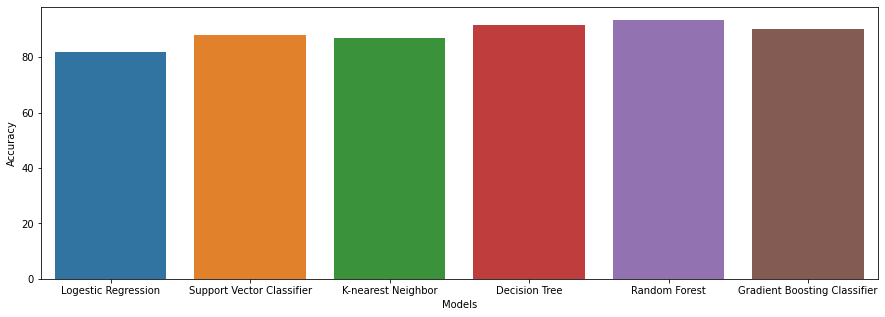

In [45]:
plt.figure(figsize=(15,5))
sns.barplot(Final_Results['Models'], Final_Results['Accuracy'])